In [3]:
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

# Ajoutez cette ligne pour afficher les graphiques dans le notebook
%matplotlib inline

class RSIMACDStrategy(bt.Strategy):
    params = (
        ("rsi_period", 14),
        ("macd_period_me1", 12),
        ("macd_period_me2", 26),
        ("macd_period_signal", 9),
        ("buy_threshold", 70),
    )

    def __init__(self):
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)
        self.macd = bt.indicators.MACD(
            period_me1=self.params.macd_period_me1,
            period_me2=self.params.macd_period_me2,
            period_signal=self.params.macd_period_signal
        )
        self.sma50 = bt.indicators.SimpleMovingAverage(self.data.close, period=50)
        self.sma300 = bt.indicators.SimpleMovingAverage(self.data.close, period=300)

    def next(self):
        if self.sma300 > self.data.close:
            if self.rsi < self.params.buy_threshold and self.data.close < self.sma50 and \
               self.data.close[-3] < self.sma50[-3] and self.macd.lines.signal[0] > self.macd.lines.macd[0]:
                self.buy(size=15)

        if self.rsi > 70 or (self.macd.lines.signal[0] < self.macd.lines.macd[0] and self.macd.lines.signal[-1] > self.macd.lines.macd[-1]):
            self.sell(size=10)

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    data = yf.download('GLO.PA', start='2012-12-7', end='2023-08-03')

    data = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data)

    cerebro.addstrategy(RSIMACDStrategy, rsi_period=14, macd_period_me1=12, macd_period_me2=26, macd_period_signal=9, buy_threshold=70)

    cerebro.broker.set_cash(10000)
    cerebro.broker.setcommission(commission=0.005)

    print('Capital initial:', cerebro.broker.getvalue())
    cerebro.run()
    print('Capital final:', cerebro.broker.getvalue())

    # Forcer l'affichage du graphique
    plt.rcParams["figure.figsize"] = [12, 8]
    cerebro.plot(style='candle')


[*********************100%%**********************]  1 of 1 completed
Capital initial: 10000
Capital final: 14206.089099991324


<IPython.core.display.Javascript object>

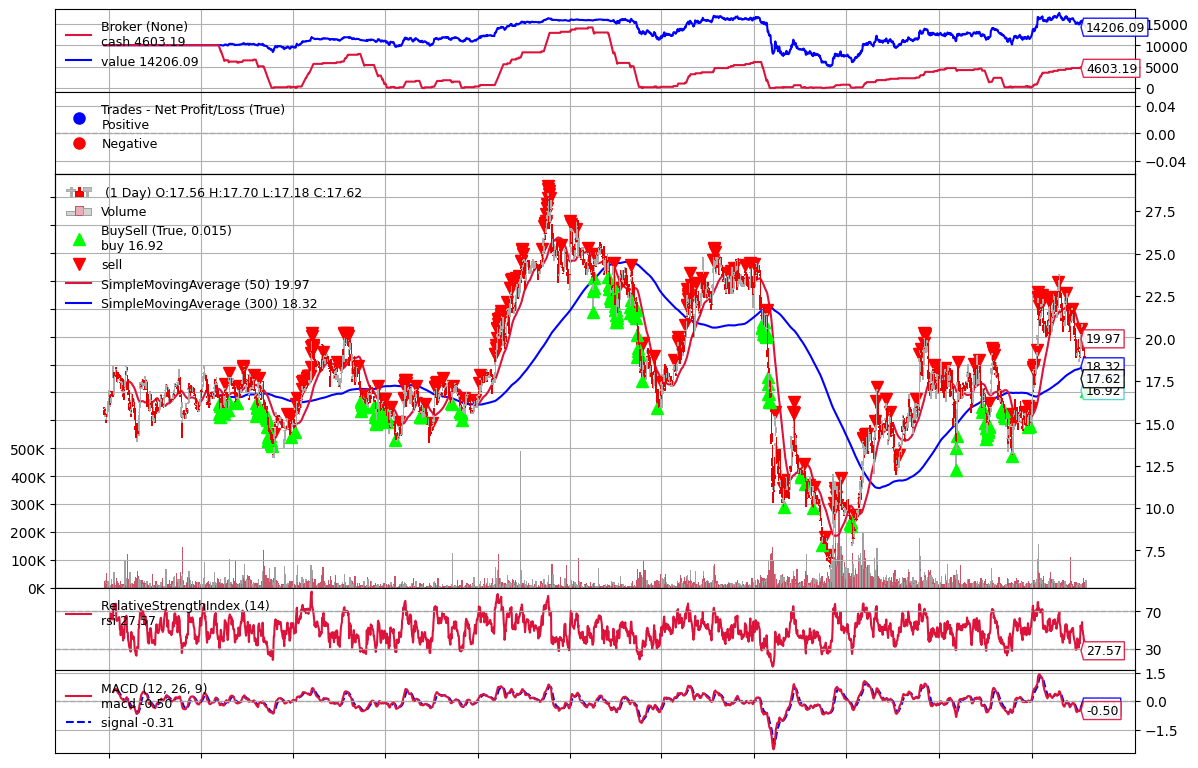

In [4]:
%matplotlib inline

plt.show()